https://www.diva-portal.org/smash/get/diva2:221300/FULLTEXT01.pdf

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)

In [2]:
df2 = pd.read_csv("skarpöHData.csv", delimiter=";", usecols=["Datum", "Vindriktning", "Vindhastighet"])

In [3]:
df2 = df2.dropna()
df2["Datum"] = pd.to_datetime(df2["Datum"])
df2.head()

Datum  Vindriktning  Vindhastighet
0 1976-09-01         230.0           13.0
1 1976-09-01         260.0            5.0
2 1976-09-01         210.0            7.0
3 1976-09-01         220.0            6.0
4 1976-09-01         220.0            5.0

In [4]:
df2.describe()

Datum   Vindriktning  Vindhastighet
count                         341349  341349.000000  341349.000000
mean   2003-11-19 00:07:52.309571840     197.933350       4.035876
min              1976-09-01 00:00:00       0.000000       0.000000
25%              1994-01-10 00:00:00     139.000000       2.400000
50%              2003-12-30 00:00:00     204.000000       3.700000
75%              2013-10-25 00:00:00     273.000000       5.300000
max              2024-06-01 00:00:00     360.000000      20.400000
std                              NaN      94.486415       2.288148

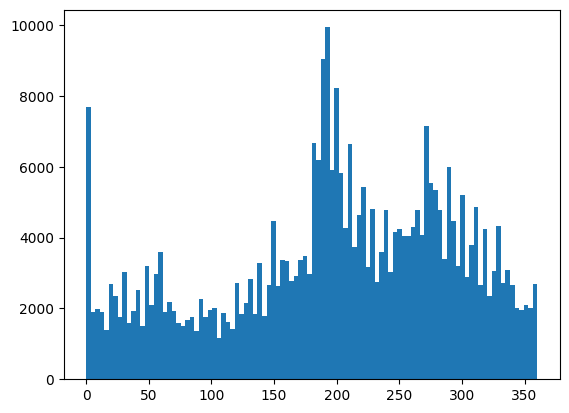

In [5]:
plt.hist(df2["Vindriktning"], bins=100)
plt.show()

In [8]:
wind_data = df2.groupby("Vindriktning").agg(
    freq = ("Vindriktning", "count"),
    speed = ("Vindhastighet", "mean")
)

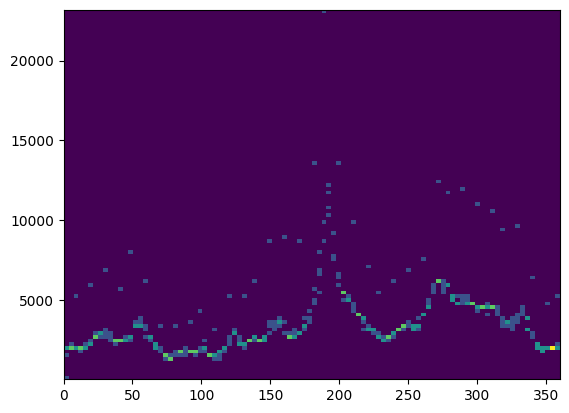

In [14]:
plt.hist2d(wind_data.index.values, wind_data["freq"].values * wind_data["speed"].values, bins=100)
plt.show()

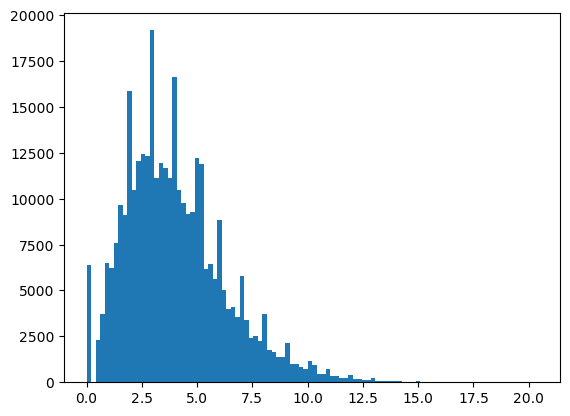

In [10]:
plt.hist(df2["Vindhastighet"], bins=100)
plt.show()

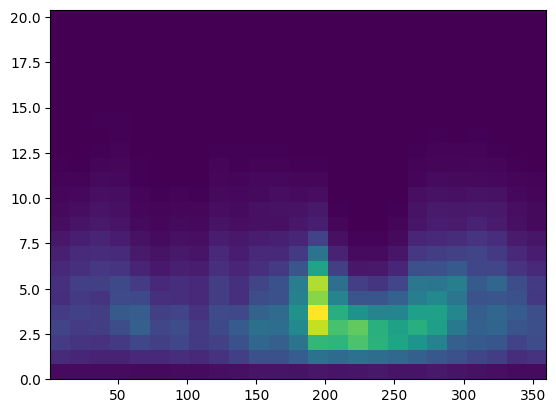

In [6]:
plt.hist2d(df2[df2["Vindriktning"] != 0]["Vindriktning"], df2[df2["Vindriktning"] != 0]["Vindhastighet"], bins=25)
plt.show()

In [7]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

mah = pd.DataFrame(moving_average(df2["Vindhastighet"], 50), columns=["Vindhastighet"])
mar = pd.DataFrame(moving_average(df2["Vindriktning"], 50), columns=["Vindriktning"])
mah["dt"] = df2["Datum"]
mah["dt"] = pd.to_datetime(mah["dt"])
mar["dt"] = df2["Datum"]
mar["dt"] = pd.to_datetime(mar["dt"])

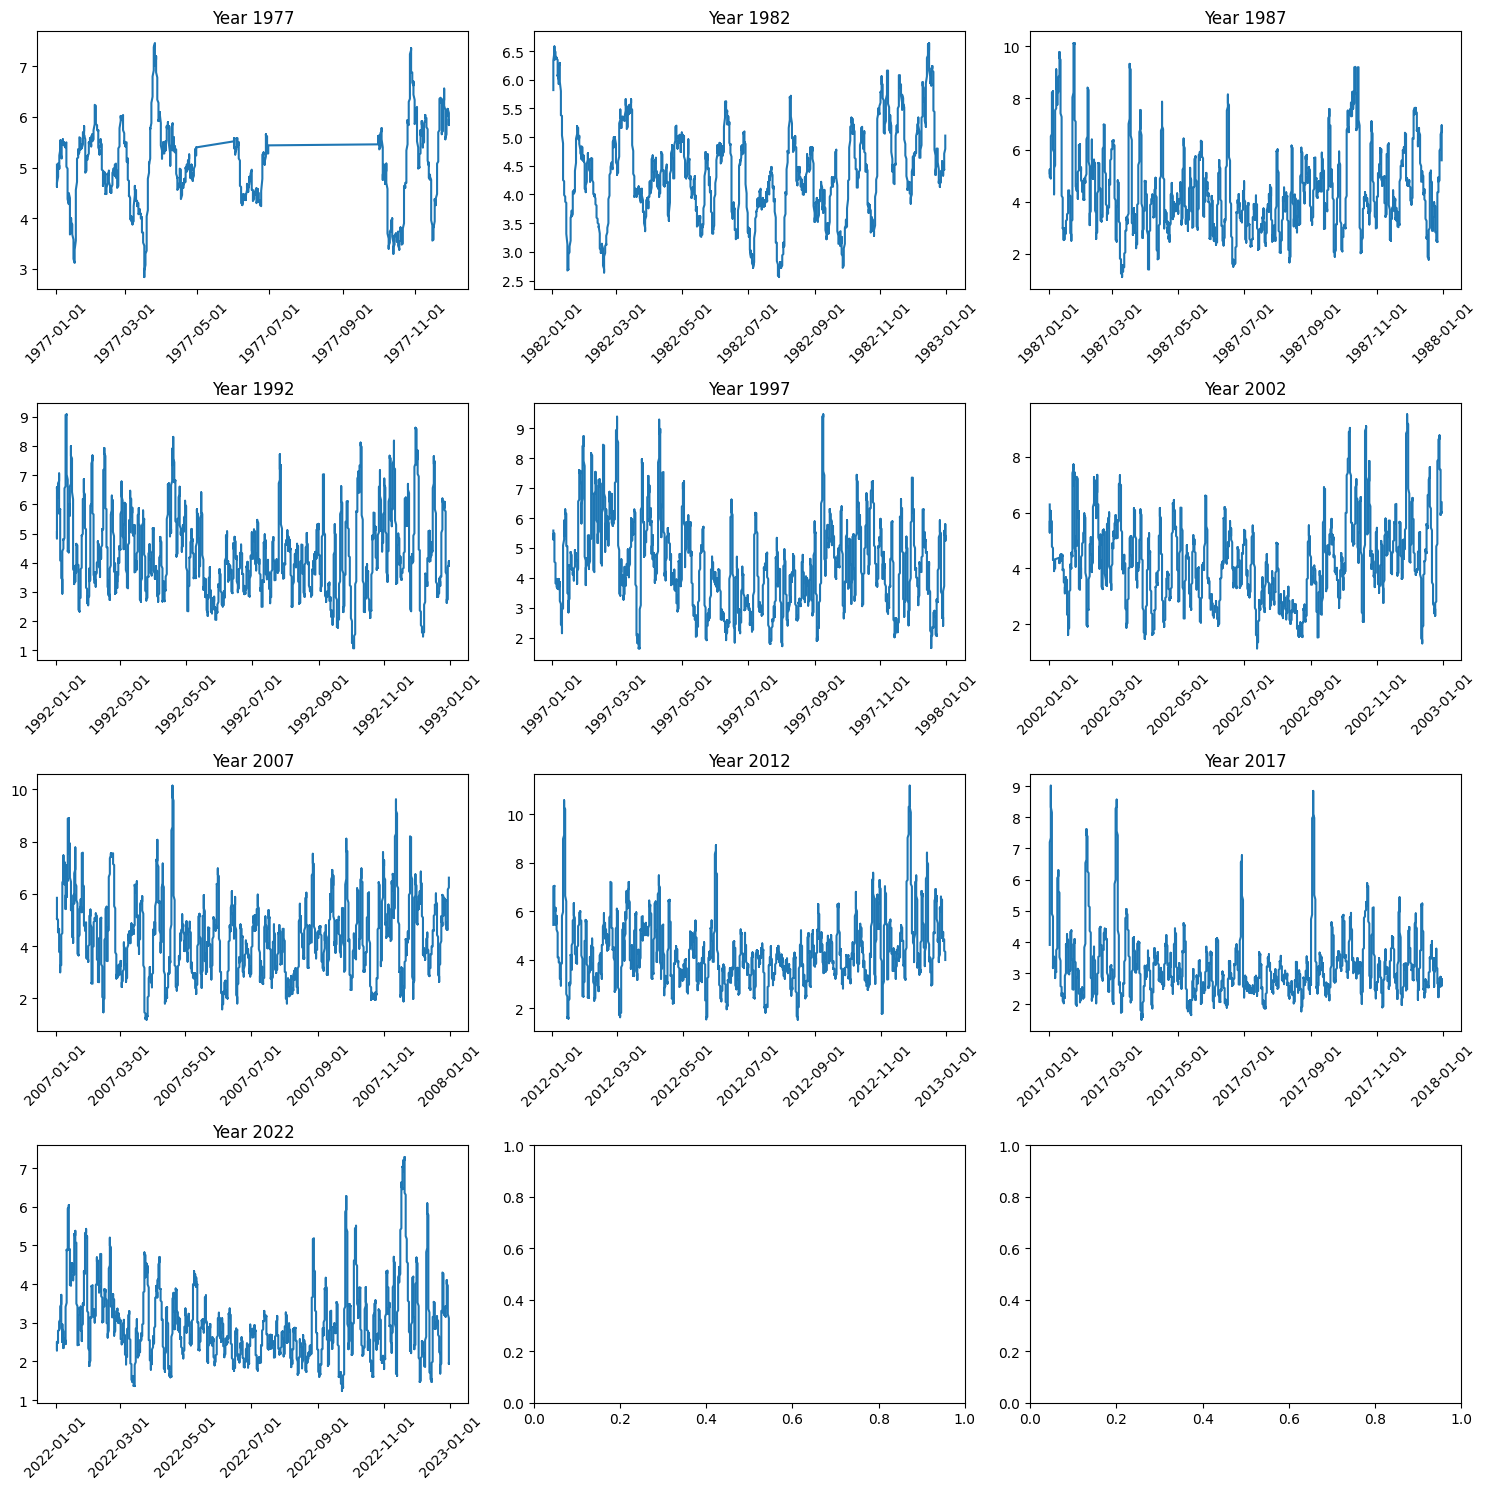

In [9]:
fig, axs = plt.subplots(4, 3, figsize=(15, 15))

for i in range(10):
    j = i * 5
    mah3 = mah[(mah["dt"] > f"{1977 + j}-01-01") & (mah["dt"] < f"{1977 + j + 1}-01-01")]
    
    ax = axs[i // 3, i % 3]
    ax.plot(mah3["dt"], mah3["Vindhastighet"])
    ax.set_title(f"Year {1977 + j}")
    ax.set_xticks(ax.get_xticks())
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

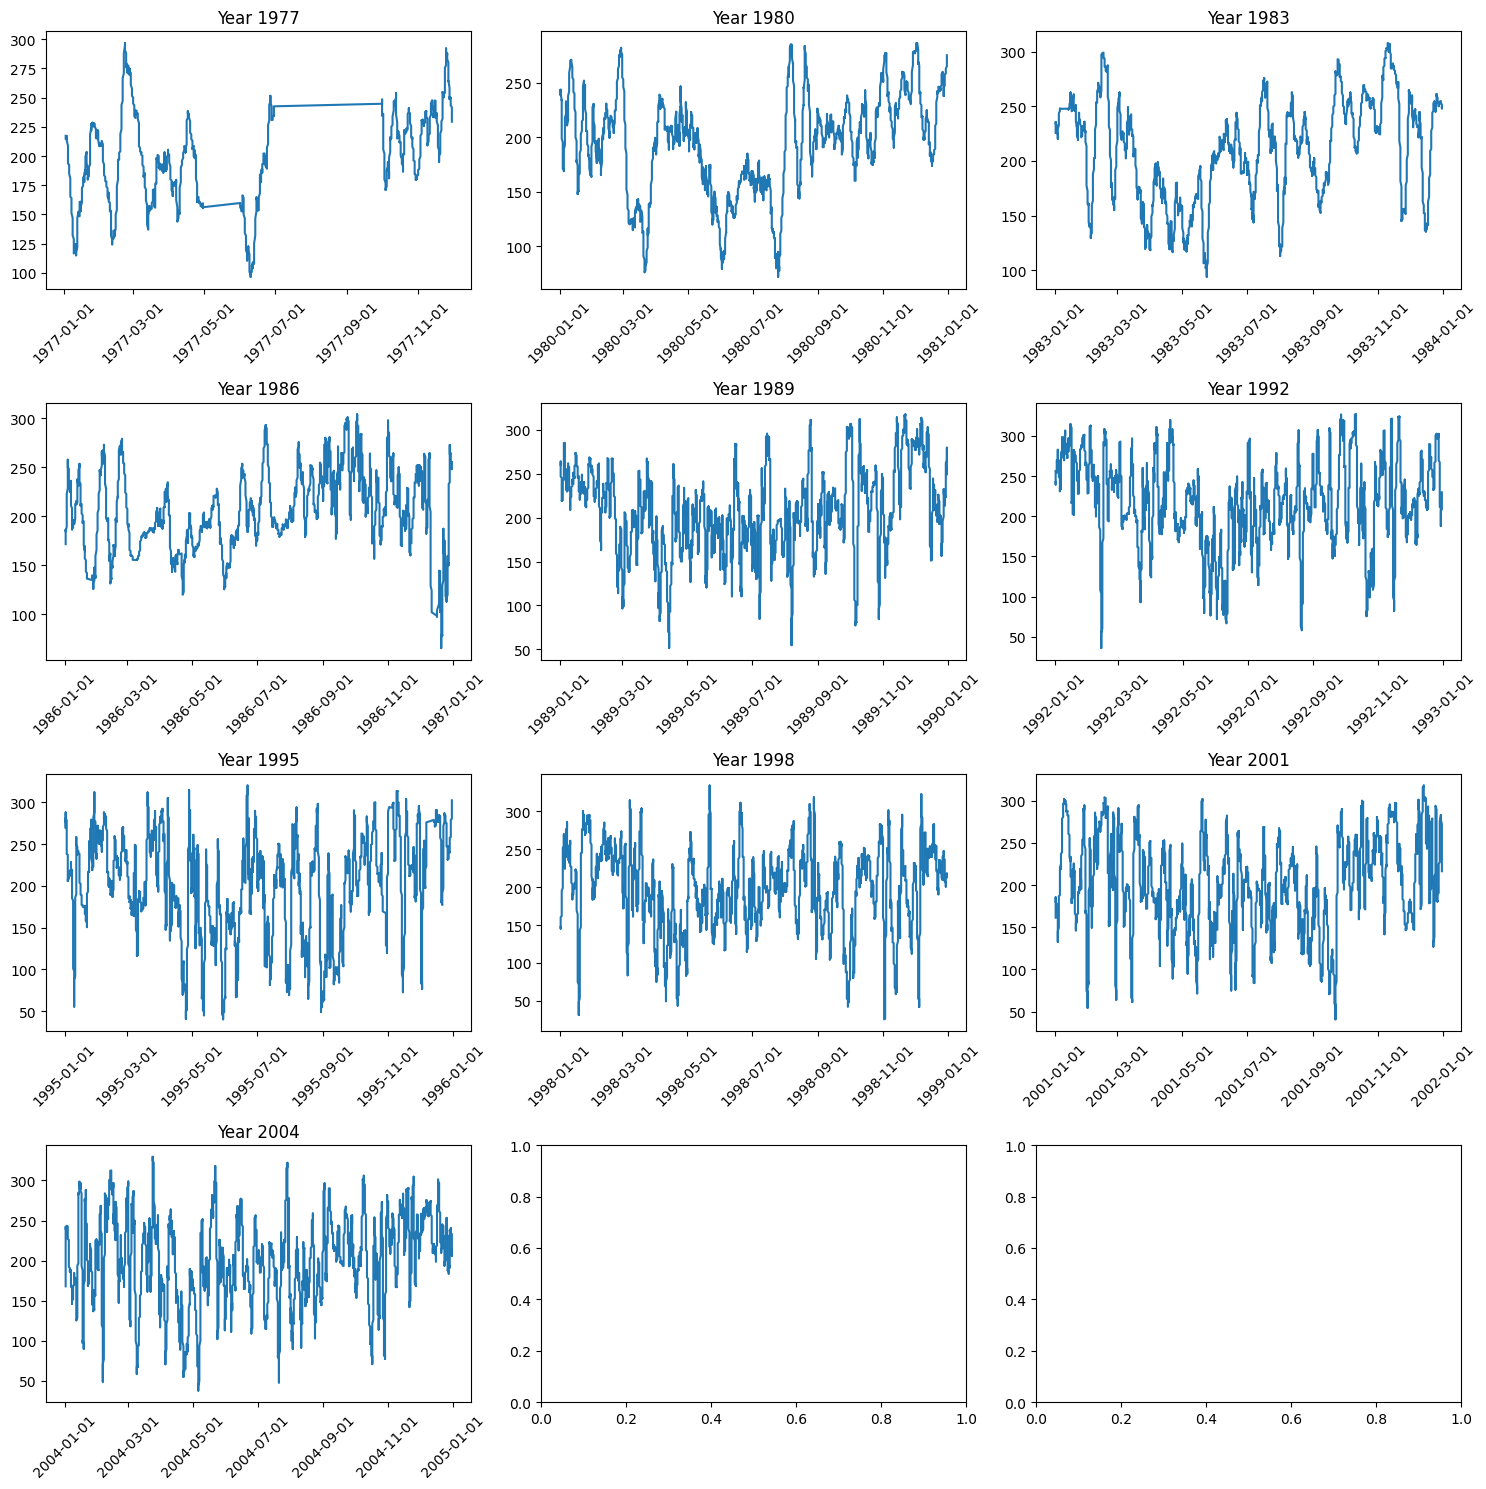

In [78]:
fig, axs = plt.subplots(4, 3, figsize=(15, 15))

for i in range(10):
    j = i * 5
    mar3 = mar[(mar["dt"] > f"{1977 + j}-01-01") & (mar["dt"] < f"{1977 + j + 1}-01-01")]
    
    ax = axs[i // 3, i % 3]
    ax.plot(mar3["dt"], mar3["Vindriktning"])
    ax.set_title(f"Year {1977 + j}")
    ax.set_xticks(ax.get_xticks())
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [195]:
from windrose import WindroseAxes

def plot_windrose(data, title="none"):
    ws = data["Vindhastighet"]
    wd = data["Vindriktning"]

    fig = plt.figure(figsize=(25, 15))

    ax1 = fig.add_subplot(131, projection="windrose")   
    ax1.set_title("Filled Windrose with contours " + title)
    ax1.contourf(wd, ws, bins=np.arange(0, 8, 1), cmap=plt.cm.hot)
    ax1.contour(wd, ws, bins=np.arange(0, 8, 1), colors="black")
    ax1.set_legend()

    ax2 = fig.add_subplot(132, projection="windrose")   
    ax2.set_title("Stacked Windrose normed " + title)
    ax2.bar(wd, ws, normed=True, opening=0.8, edgecolor="White", cmap=plt.cm.hot)
    ax2.set_legend()

    ax3 = fig.add_subplot(133, projection="windrose")   
    ax3.set_title("Stacked Windrose with bins " + title)
    ax3.box(wd, ws, bins=np.arange(0, 8, 1), cmap=plt.cm.hot)
    ax3.set_legend()

    plt.show()

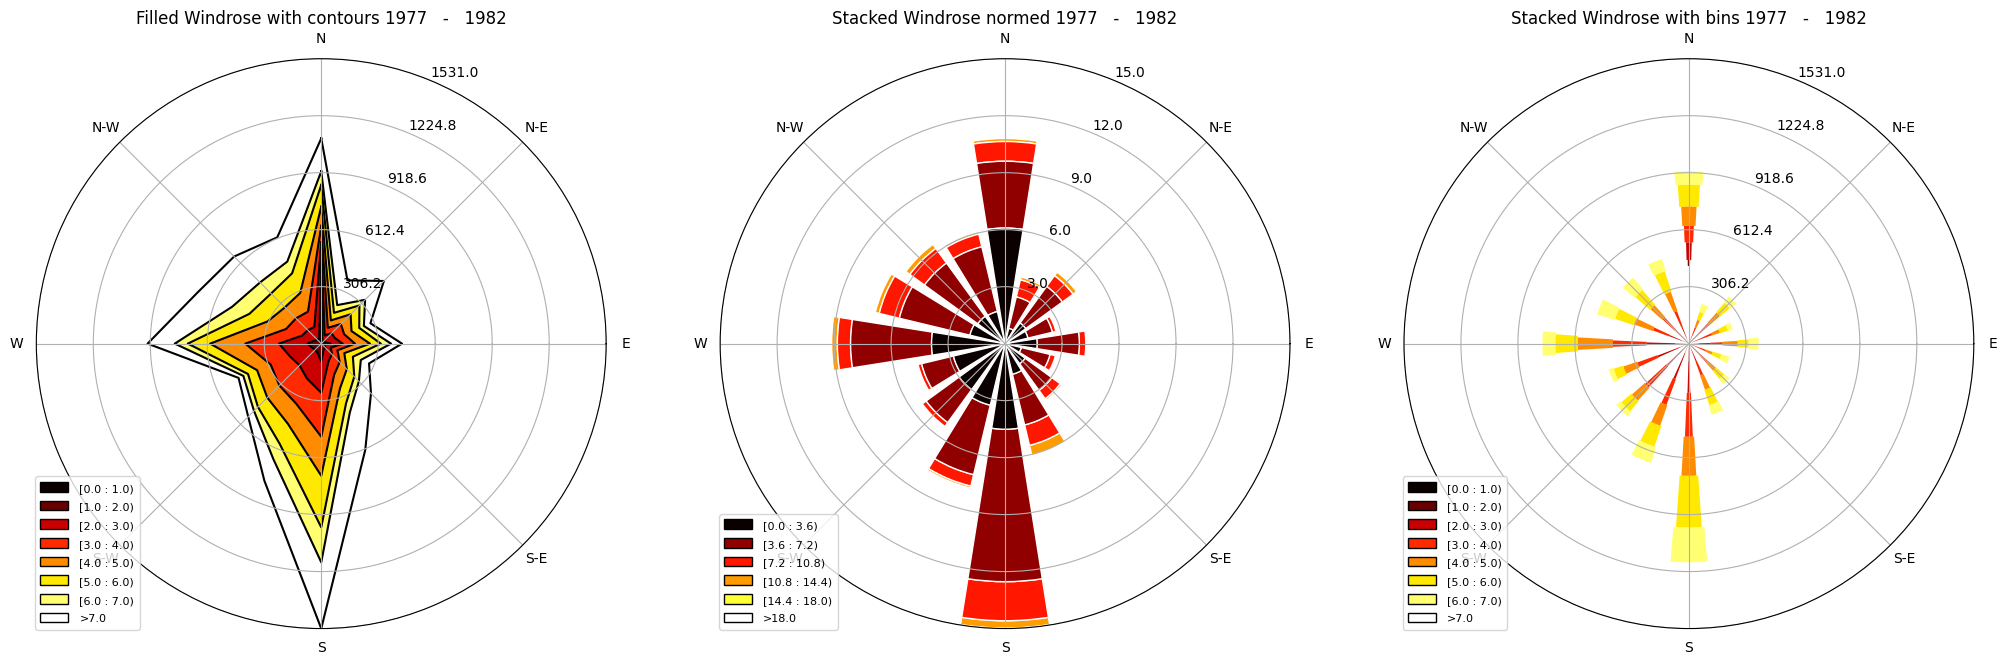

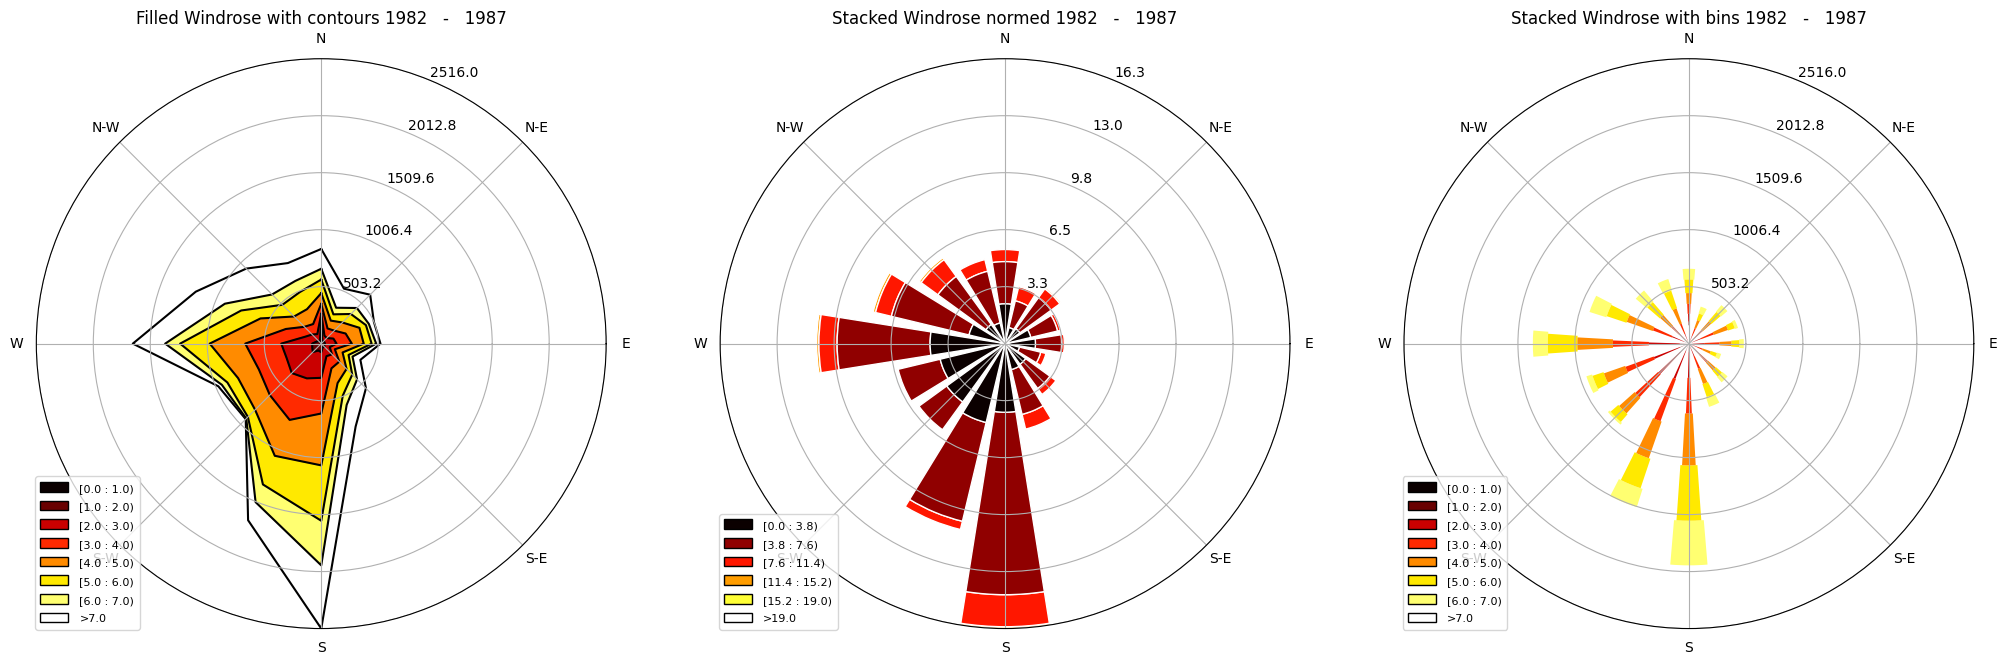

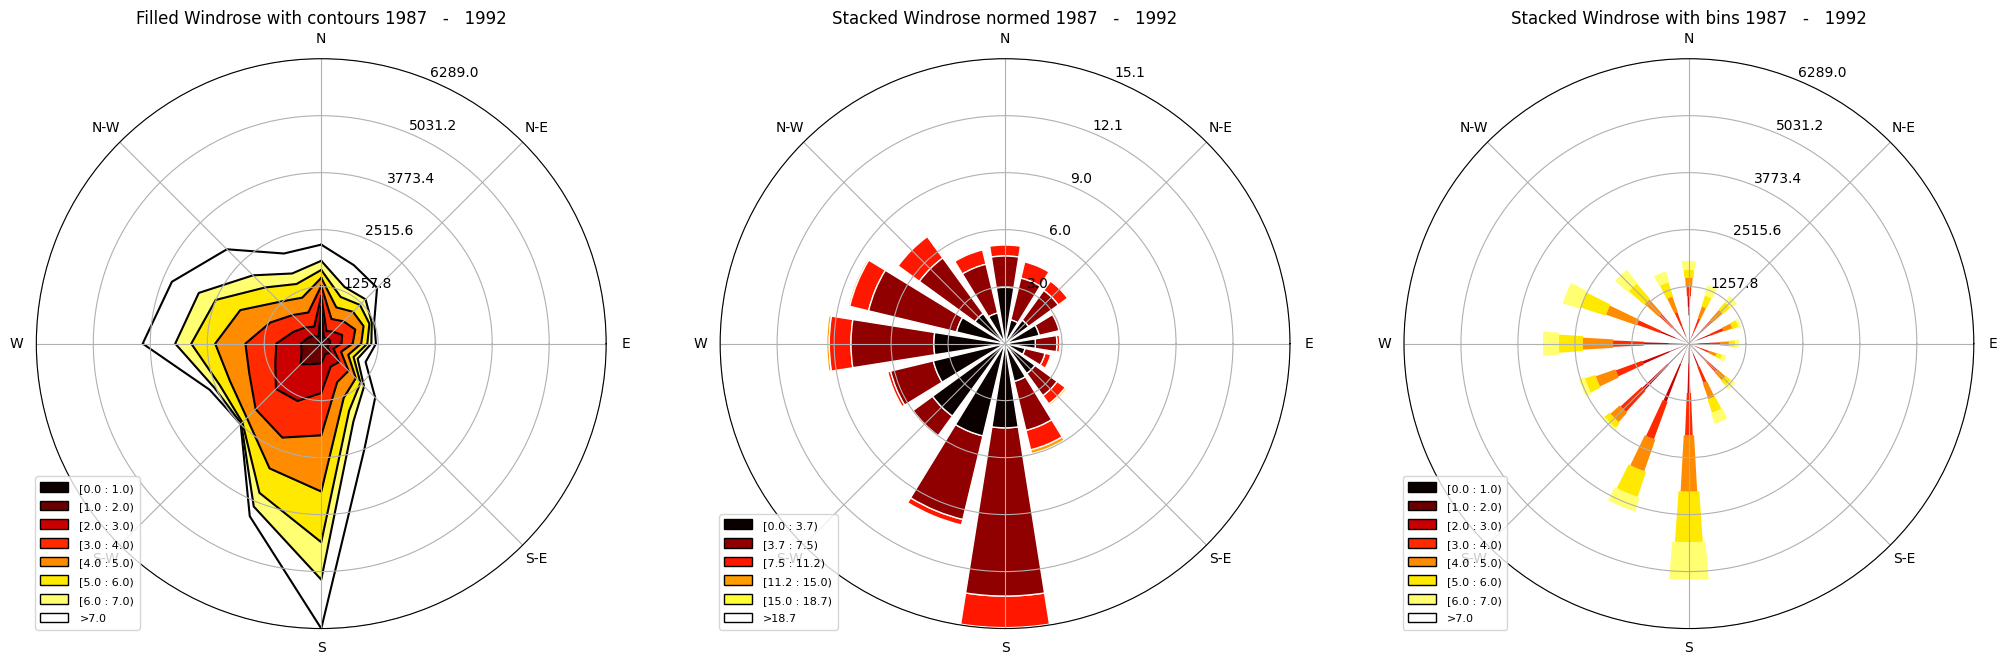

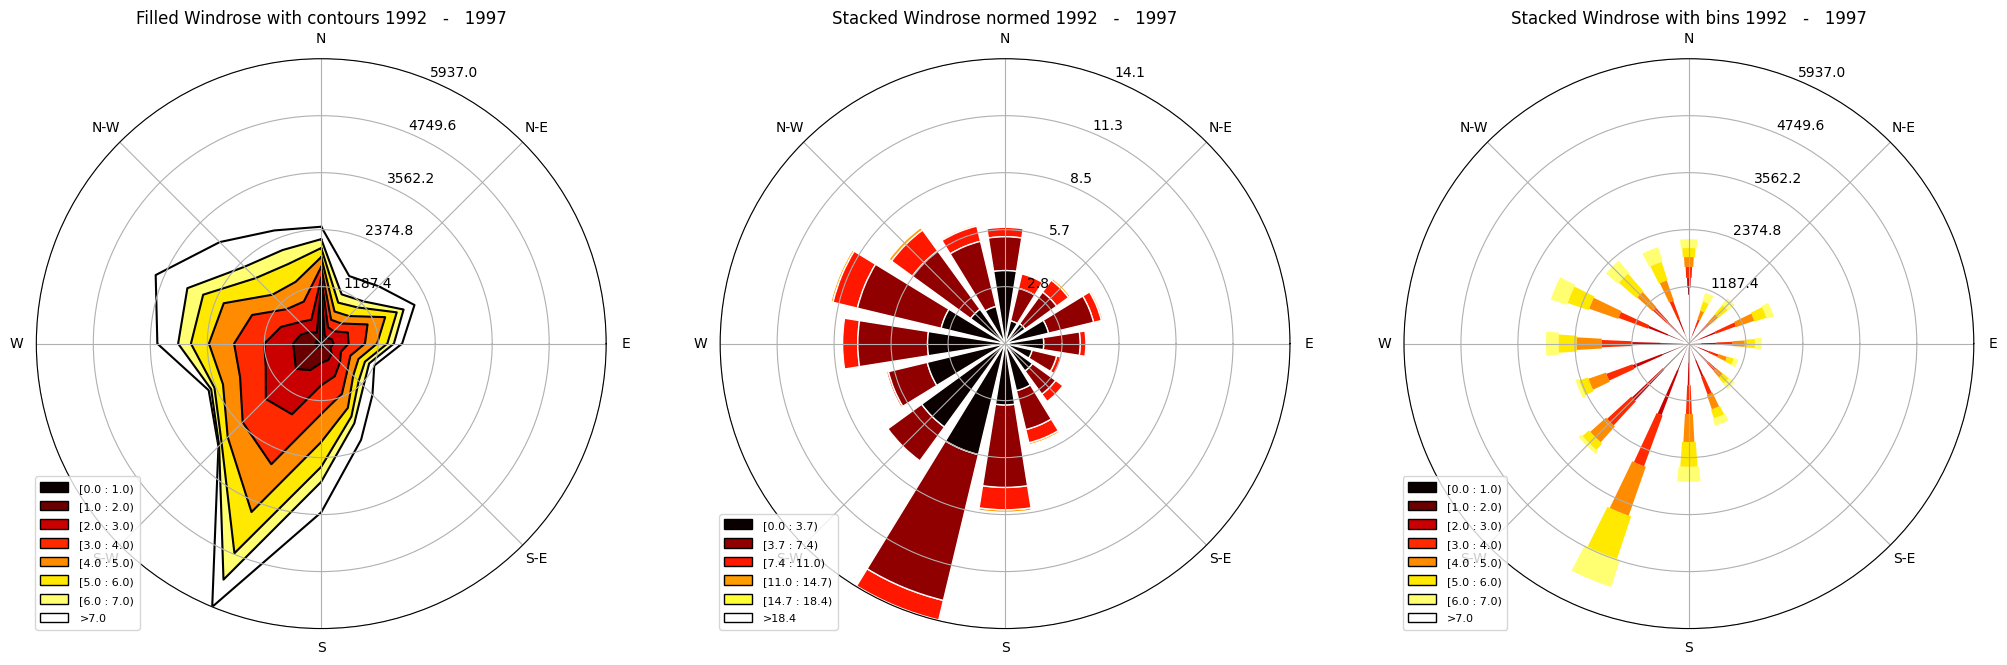

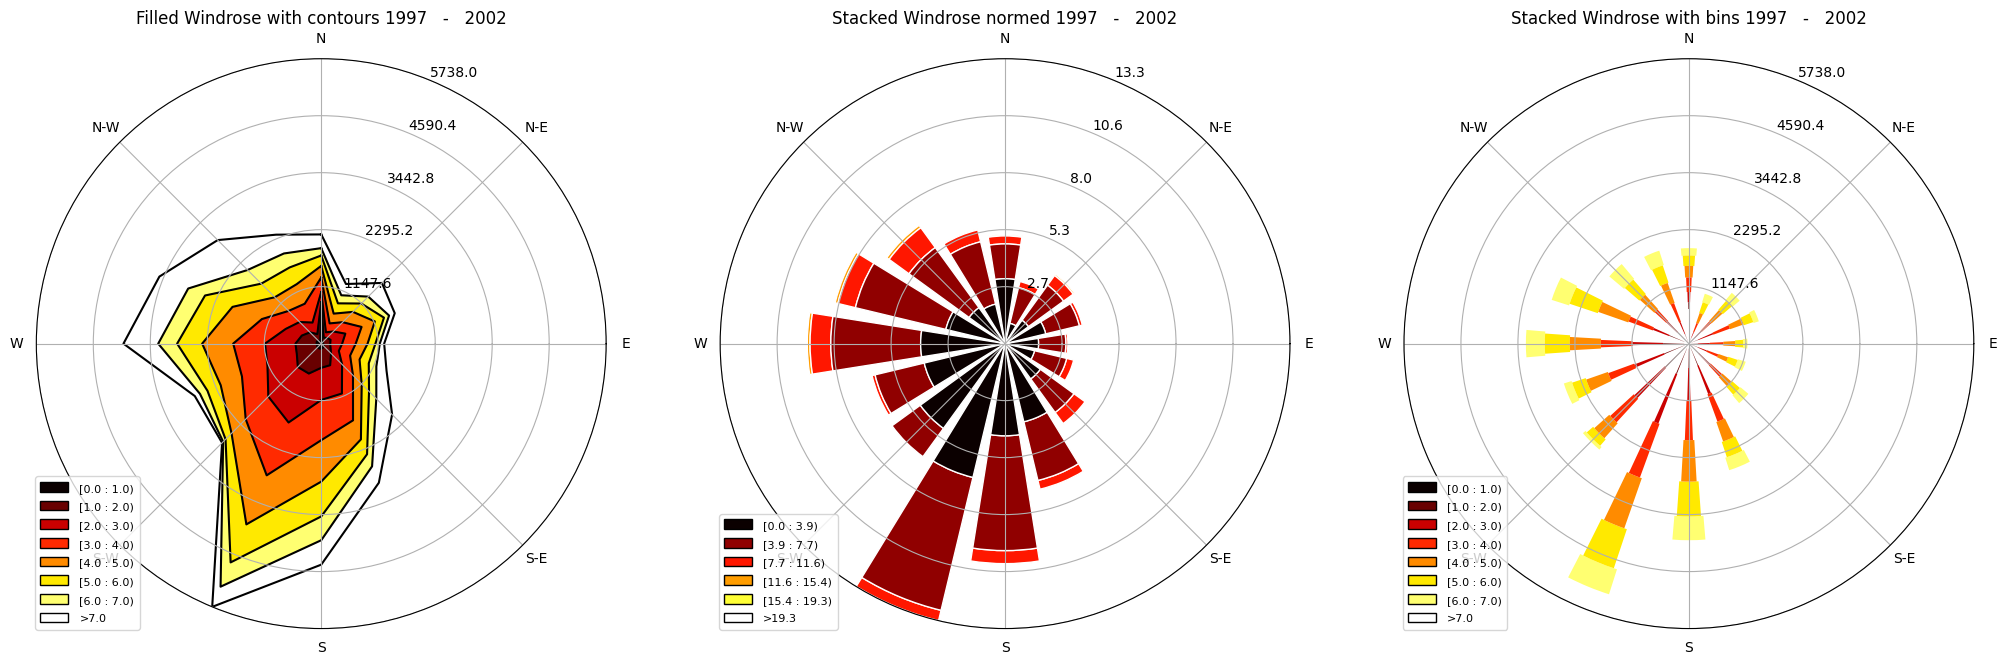

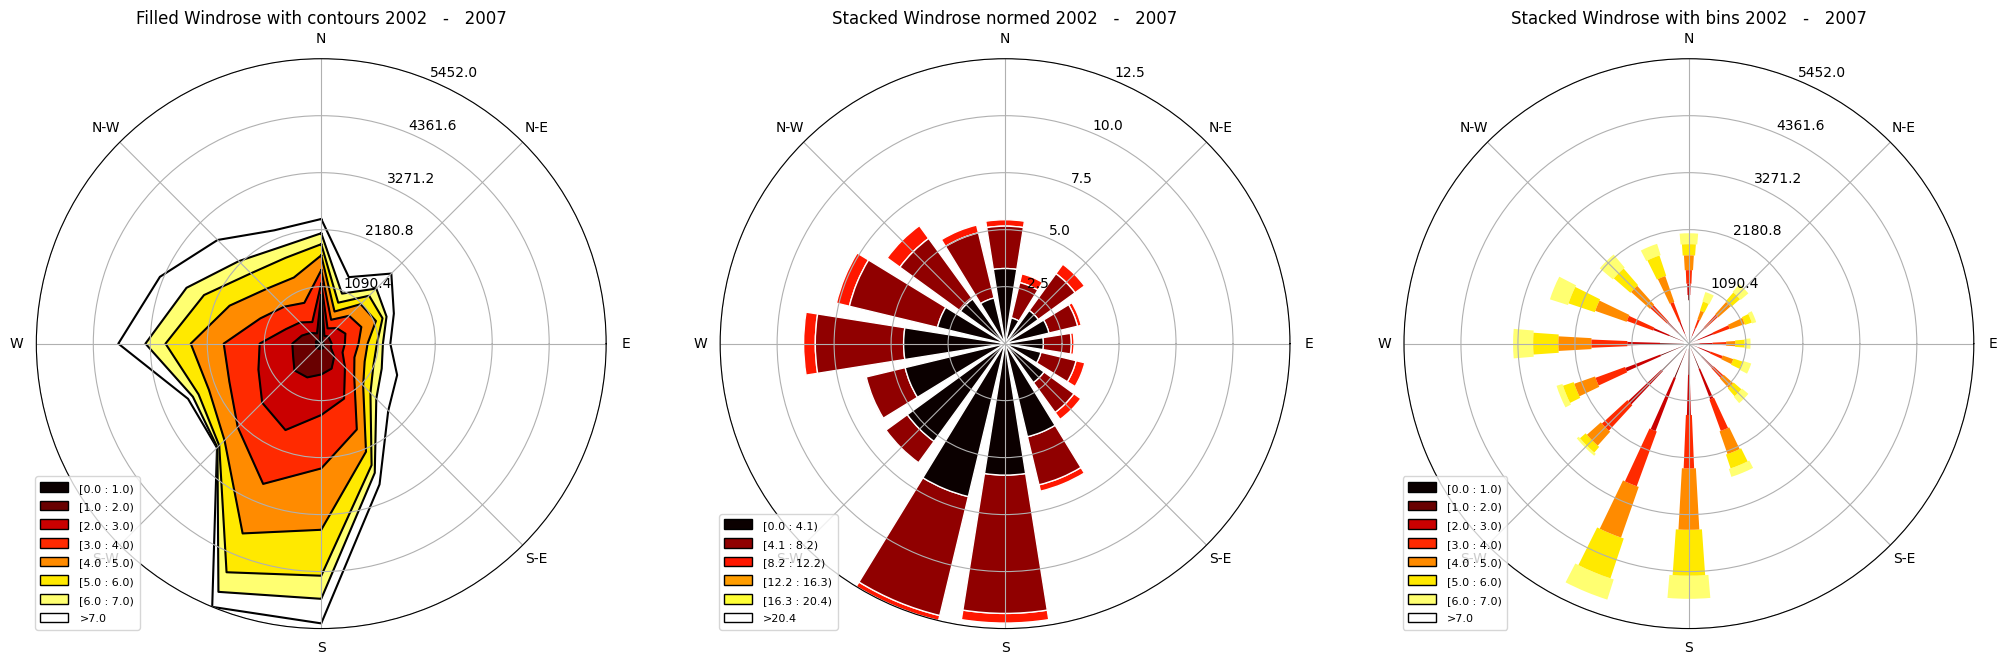

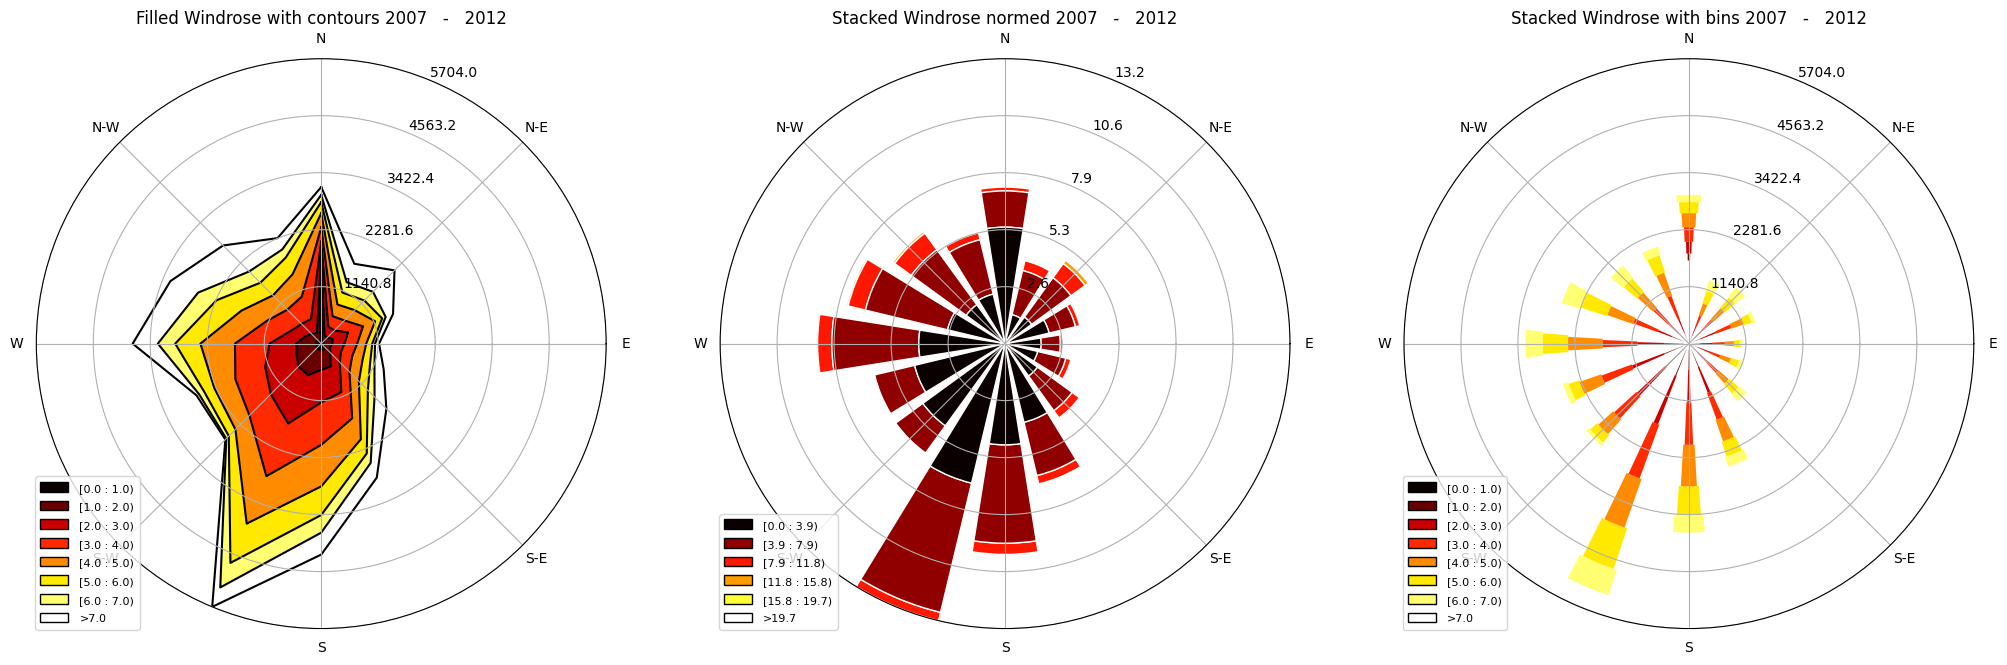

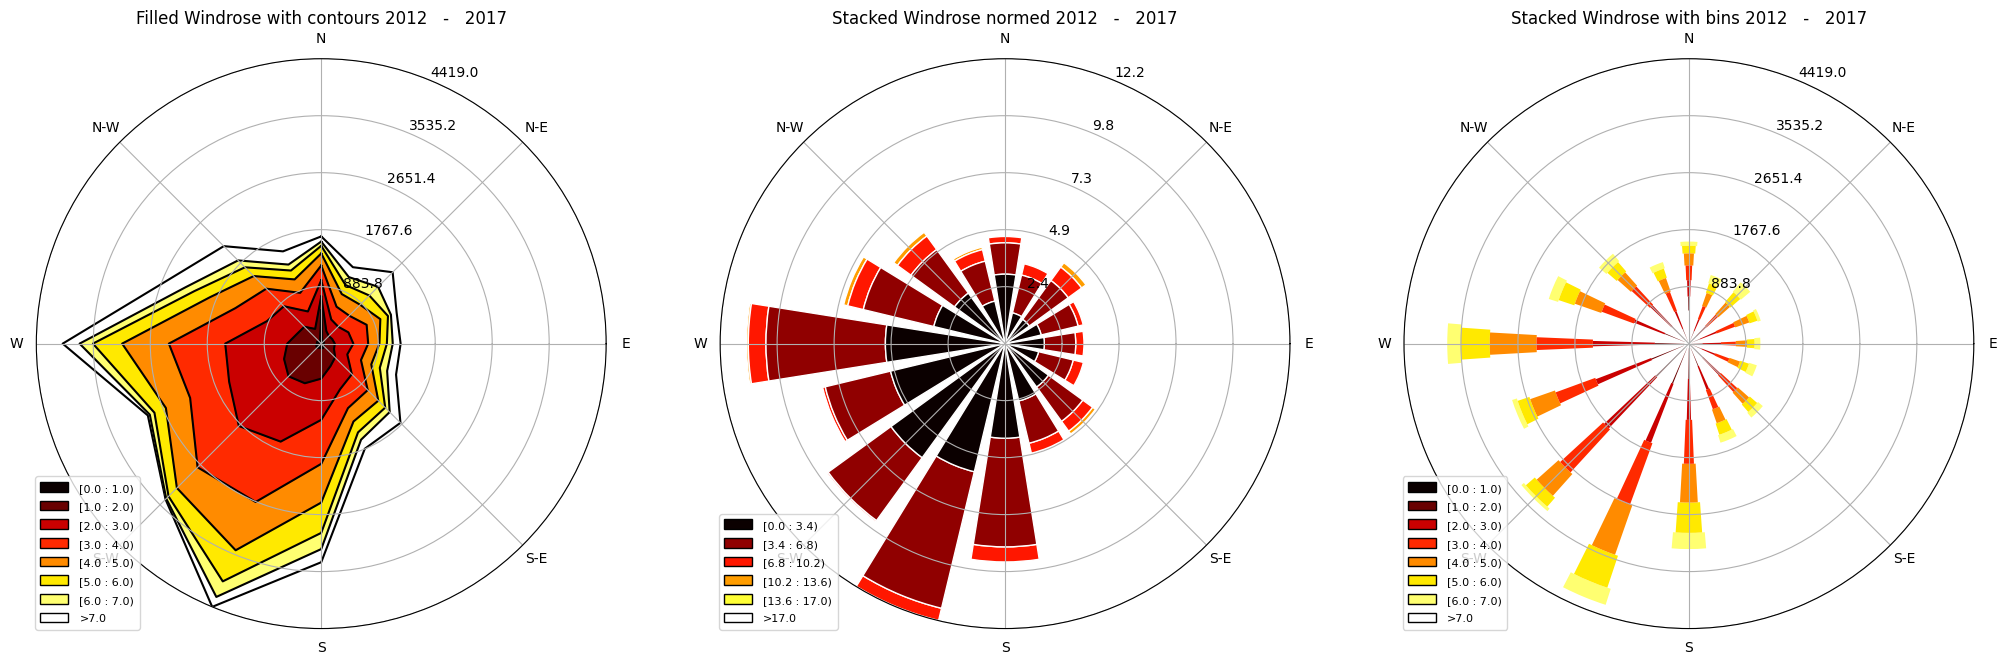

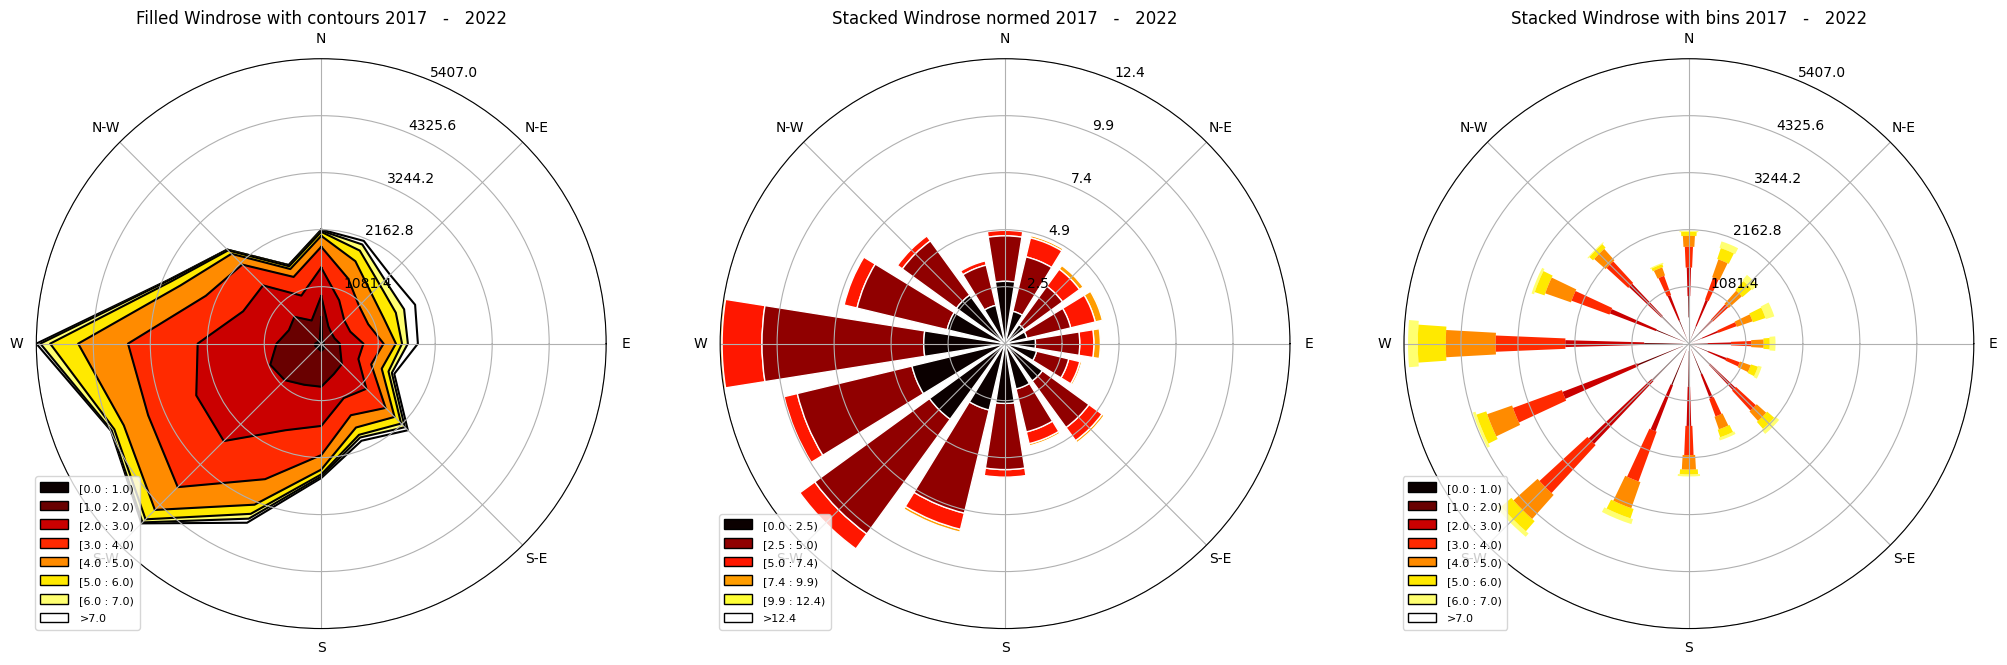

In [206]:
import math

time_step = 5
total_time = 2024 - 1977
for i in range(math.floor(total_time / time_step)):
    df_timed = df2[(df2["Datum"] > f"{1977 + i * time_step}-01-01") & (df2["Datum"] < f"{1977 + (i + 1) * time_step}-01-01")]
    plot_windrose(df_timed, f"{1977 + i * time_step}   -   {1977 + (i + 1) * time_step}")

<BarContainer object of 360 artists>

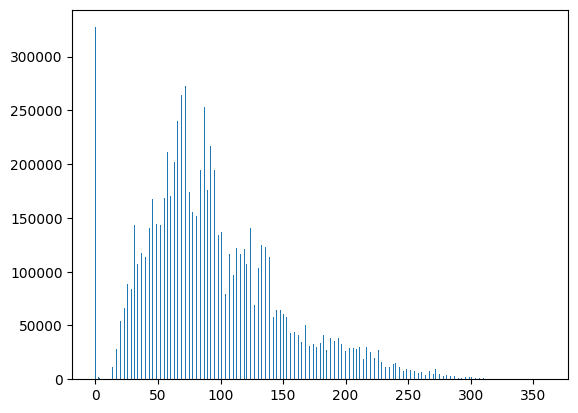

In [217]:
df_timed = df2[(df2["Datum"] > f"{2016}-01-01") & (df2["Datum"] < f"{2023}-01-01")]
plt.bar(range(360), plt.hist(df_timed["Vindhastighet"], bins=360)[0] * plt.hist(df_timed["Vindriktning"], bins=360)[0])